In [2]:
import tweepy as tw
import pandas as pd 
import os


consumer_key = 'Wk8EGJubNo0X6r8ght6bjvIcS'
consumer_secret = "45FvGtUm4CrCxW3jbJctogWB5Bj9pz2SzLhrUdHYjV8xqOMnP0"
access_token = "1030506160191877121-WOyqfY1lY79LHvolQBP5ABxTawieXm"
access_token_secret = "QWuvNp6WEKnMldRxQ3IyiQQcN6bgkJJoxpna7IpXFi9RI"
  

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
search_words = "#coronavirus"
date_since = "2019-11-01"

In [14]:
tweets = tw.Cursor(api.search, 
                           q=search_words,
                           lang="en",
                           since=date_since).items(50)

users_locs = [[tweet.user.screen_name, tweet.user.location,tweet.text,tweet.created_at,tweet.user.followers_count, tweet.user.listed_count,tweet.user.friends_count] for tweet in tweets]


In [15]:
tweet_ = pd.DataFrame(data=users_locs, 
                    columns=['user', "location",'tweet','created_at','followers','listed_count','friends_count'])
tweet_

,user,location,tweet,created_at,followers,listed_count,friends_count
0,BrianJa55614625,,RT @IsChinar: Heartbreaking.\n\nA couple work ...,2020-02-09 03:06:24,118,0,576
1,c0lt45,,RT @MithriCastle: #CoronaVirus \n\nthis is not...,2020-02-09 03:06:23,565,7,488
2,alohasaazu,Maldives,RT @CoronaVirusFlu: Breaking News: The death t...,2020-02-09 03:06:23,1973,10,697
3,movingaverages,"Seoul, Korea",RT @IsChinar: The spread north\n\nNorth China ...,2020-02-09 03:06:22,330,12,980
4,SweetFreedom29,"Freedom, USA",DEATH TOLL RISES - #Coronavirus fatalities top...,2020-02-09 03:06:22,29057,421,13680
5,salleh,,RT @arslan_hidayat: We all worried about the #...,2020-02-09 03:06:22,106,0,4995
6,globaltimesnews,"Beijing, China",RT @globaltimesnews: “How I survived coronavir...,2020-02-09 03:06:21,1619423,3618,493
7,SpeechFreedomCN,Beijing,"Luoyang woman Wang, who said in WeChat that he...",2020-02-09 03:06:21,13999,82,23
8,limabelaslimaa,,RT @Ooranjan: Drone shots of Wuhan. It’s liter...,2020-02-09 03:06:21,84,0,176
9,lllaaauuuhk,Hong Kong,RT @ChrisDerps: Chinese social networking plat...,2020-02-09 03:06:20,387,0,651


In [16]:
#tweet_ = pd.read_csv('tweets.csv',lineterminator='\n')

In [17]:
def original(tweet): 
    if tweet.split()[0] == 'RT': 
        return tweet.split()[1][1:-1]
    return None 

tweet_['original_creator'] = tweet_['tweet'].map(original)

In [18]:
def retweet(tweet): 
    if tweet.split()[0] == 'RT': 
        return 1
    return 0 

tweet_['retweet'] = tweet_['tweet'].map(retweet)

In [19]:
tweet_

,user,location,tweet,created_at,followers,listed_count,friends_count,original_creator,retweet
0,BrianJa55614625,,RT @IsChinar: Heartbreaking.\n\nA couple work ...,2020-02-09 03:06:24,118,0,576,IsChinar,1
1,c0lt45,,RT @MithriCastle: #CoronaVirus \n\nthis is not...,2020-02-09 03:06:23,565,7,488,MithriCastle,1
2,alohasaazu,Maldives,RT @CoronaVirusFlu: Breaking News: The death t...,2020-02-09 03:06:23,1973,10,697,CoronaVirusFlu,1
3,movingaverages,"Seoul, Korea",RT @IsChinar: The spread north\n\nNorth China ...,2020-02-09 03:06:22,330,12,980,IsChinar,1
4,SweetFreedom29,"Freedom, USA",DEATH TOLL RISES - #Coronavirus fatalities top...,2020-02-09 03:06:22,29057,421,13680,None,0
5,salleh,,RT @arslan_hidayat: We all worried about the #...,2020-02-09 03:06:22,106,0,4995,arslan_hidayat,1
6,globaltimesnews,"Beijing, China",RT @globaltimesnews: “How I survived coronavir...,2020-02-09 03:06:21,1619423,3618,493,globaltimesnews,1
7,SpeechFreedomCN,Beijing,"Luoyang woman Wang, who said in WeChat that he...",2020-02-09 03:06:21,13999,82,23,None,0
8,limabelaslimaa,,RT @Ooranjan: Drone shots of Wuhan. It’s liter...,2020-02-09 03:06:21,84,0,176,Ooranjan,1
9,lllaaauuuhk,Hong Kong,RT @ChrisDerps: Chinese social networking plat...,2020-02-09 03:06:20,387,0,651,ChrisDerps,1


In [20]:
tweet_['original_creator'].value_counts()

howroute           3
IsChinar           3
MithriCastle       2
Ooranjan           2
XHNews             2
ndtv               1
EndGameWW3         1
arslan_hidayat     1
ShashiTharoor      1
HawleyMO           1
CGTNOfficial       1
NorbertElekes      1
PoliticalShort     1
Anfield_king       1
IndoPac_Info       1
WilliamYang120     1
CoronaVirusFlu     1
chefjeff17579      1
Nectar_Gan         1
V2019N             1
janisfrayer        1
danharris          1
Jkylebass          1
EstulinDaniel      1
ChrisDerps         1
DV99999            1
SecPompeo          1
PeterSweden7       1
Kronos_333         1
WarsontheBrink     1
demosisto          1
inteldotwav        1
sarahclarkehk      1
Tssomas            1
globaltimesnews    1
Name: original_creator, dtype: int64

In [21]:
tweet_['retweet'].value_counts()

1    42
0     8
Name: retweet, dtype: int64

In [22]:
tweet_['user'].value_counts()

BrianJa55614625    1
bodaciousbcf       1
Summer_onFire      1
lucifer13999       1
CikManisDonut      1
hunkaberninlove    1
Merchan61189646    1
Sinafoa1           1
rajeshkalyankar    1
SpeechFreedomCN    1
MonicaSpencer87    1
NSchneiderAZ13     1
SimVooV            1
OakIce             1
SweetFreedom29     1
lllaaauuuhk        1
movingaverages     1
ajcarungay         1
pattyw_101         1
8141Sing           1
c0lt45             1
HKersMessenger     1
kfbnjunior         1
winnie_HKer        1
ericayeung2        1
Massaraivan        1
globaltimesnews    1
jooyo1989          1
bloodtribeelect    1
gobambidiestro     1
EcoInternetDrGB    1
artrocksme         1
bachok_ahmad       1
LizDolphinfluff    1
bolortt1           1
sudheerpmna        1
magadeplorable4    1
CAREGIVER1229      1
Adausto            1
AsaTheCat          1
LLMleung           1
Wycked_Yum         1
Next_Gen_Han       1
alohasaazu         1
Sesiri             1
anblanx            1
Jennifer75116      1
salleh       

In [23]:
#tweet_.to_csv('tweets.csv')

In [25]:
df = tweet_

In [27]:
tweet_df = tweet_

In [28]:
from pandas import DataFrame
new_df = DataFrame() 

In [29]:
tweet_df['tweet'].iloc[0].split()

['RT',
 '@IsChinar:',
 'Heartbreaking.',
 'A',
 'couple',
 'work',
 'up',
 'courage',
 'to',
 'get',
 'shipped',
 'away',
 'in',
 'a',
 'giant',
 'metal',
 'box...to',
 'be',
 'shipped',
 'off',
 'to',
 'somewhere,',
 'they',
 'dont…']

In [30]:
def get_tweets(tweet):
    sentence = " "
    new_tweet = tweet.split()[2:]
    for x in new_tweet:
        x = x + ' '
        sentence += x
    return sentence 

tweet_df['new_tweet'] = tweet_df['tweet'].map(get_tweets)

In [32]:
tweet_df2 = tweet_.drop(['tweet'], axis = 1)

In [33]:
tweet_df2

,user,location,created_at,followers,listed_count,friends_count,original_creator,retweet,new_tweet
0,BrianJa55614625,,2020-02-09 03:06:24,118,0,576,IsChinar,1,Heartbreaking. A couple work up courage to ge...
1,c0lt45,,2020-02-09 03:06:23,565,7,488,MithriCastle,1,#CoronaVirus this is not a movie https://t.co...
2,alohasaazu,Maldives,2020-02-09 03:06:23,1973,10,697,CoronaVirusFlu,1,Breaking News: The death toll from the #coron...
3,movingaverages,"Seoul, Korea",2020-02-09 03:06:22,330,12,980,IsChinar,1,"The spread north North China isnt prepared, t..."
4,SweetFreedom29,"Freedom, USA",2020-02-09 03:06:22,29057,421,13680,None,0,RISES - #Coronavirus fatalities top those fro...
5,salleh,,2020-02-09 03:06:22,106,0,4995,arslan_hidayat,1,We all worried about the #coronavirus outbrea...
6,globaltimesnews,"Beijing, China",2020-02-09 03:06:21,1619423,3618,493,globaltimesnews,1,"“How I survived coronavirus"" Jia Na, a 24-yea..."
7,SpeechFreedomCN,Beijing,2020-02-09 03:06:21,13999,82,23,None,0,"Wang, who said in WeChat that her friend that..."
8,limabelaslimaa,,2020-02-09 03:06:21,84,0,176,Ooranjan,1,Drone shots of Wuhan. It’s literally a Ghost ...
9,lllaaauuuhk,Hong Kong,2020-02-09 03:06:20,387,0,651,ChrisDerps,1,Chinese social networking platform Douban has...


In [34]:
new_df = DataFrame()
new_df['person 1'] = tweet_df2['original_creator']
new_df['person 2'] = tweet_df2['original_creator']
new_df['tweet'] = tweet_df2['new_tweet']
new_df['location'] = tweet_df2['location']
new_df['created_at'] = tweet_df2['created_at']
new_df['followers'] = tweet_df2['followers']
new_df['listed_count'] = tweet_df2['listed_count']
new_df['friends_count'] = tweet_df2['friends_count']
new_df

,person 1,person 2,tweet,location,created_at,followers,listed_count,friends_count
0,IsChinar,IsChinar,Heartbreaking. A couple work up courage to ge...,,2020-02-09 03:06:24,118,0,576
1,MithriCastle,MithriCastle,#CoronaVirus this is not a movie https://t.co...,,2020-02-09 03:06:23,565,7,488
2,CoronaVirusFlu,CoronaVirusFlu,Breaking News: The death toll from the #coron...,Maldives,2020-02-09 03:06:23,1973,10,697
3,IsChinar,IsChinar,"The spread north North China isnt prepared, t...","Seoul, Korea",2020-02-09 03:06:22,330,12,980
4,None,None,RISES - #Coronavirus fatalities top those fro...,"Freedom, USA",2020-02-09 03:06:22,29057,421,13680
5,arslan_hidayat,arslan_hidayat,We all worried about the #coronavirus outbrea...,,2020-02-09 03:06:22,106,0,4995
6,globaltimesnews,globaltimesnews,"“How I survived coronavirus"" Jia Na, a 24-yea...","Beijing, China",2020-02-09 03:06:21,1619423,3618,493
7,None,None,"Wang, who said in WeChat that her friend that...",Beijing,2020-02-09 03:06:21,13999,82,23
8,Ooranjan,Ooranjan,Drone shots of Wuhan. It’s literally a Ghost ...,,2020-02-09 03:06:21,84,0,176
9,ChrisDerps,ChrisDerps,Chinese social networking platform Douban has...,Hong Kong,2020-02-09 03:06:20,387,0,651


In [35]:
df2 = DataFrame()
a = new_df['person 1'].append(tweet_df['user'])
b = new_df['person 2'].append(tweet_df['original_creator'])

In [66]:
df2['person1'] = a
df2['person2'] = b 
df2['tweets'] = tweet_df['new_tweet']

In [67]:
df2 = df2.reset_index().drop(['index'],axis = 1)

In [79]:
import numpy as np
df2['tweets1'] = np.where(df2['person1']==df2['person2'], df2['tweets'], 'RT')

In [85]:
df2

,person1,person2,tweets,tweets1
0,Stats_Alerts,Stats_Alerts,BREAKING: 20 French citizens evacuated from W...,BREAKING: 20 French citizens evacuated from W...
1,RDNS_TAI,RDNS_TAI,Last week #scottyfrommarketting told the Nati...,Last week #scottyfrommarketting told the Nati...
2,acherry13,acherry13,#BREAKING | Delaware resident tests NEGATIVE ...,#BREAKING | Delaware resident tests NEGATIVE ...
3,jenniferatntd,jenniferatntd,Notice about stock market in #China. No one i...,Notice about stock market in #China. No one i...
4,PDChina,PDChina,The #1st death outside China from the new #co...,The #1st death outside China from the new #co...
...,...,...,...,...
9995,willarosehip,maree_jun,A relative of mine from China just sent me th...,RT
9996,saltyjbk,charlot57790100,Residents are being locked in their homes. No...,RT
9997,mohsin360FX,Jkylebass,8 doctors in Wuhan identified the symptoms of...,RT
9998,MikeBisson8,SecAzar,"At this time, the risk to Americans remains l...",RT


In [86]:
import networkx as nx

Nodes in RT network: 771
Edges in RT network: 831


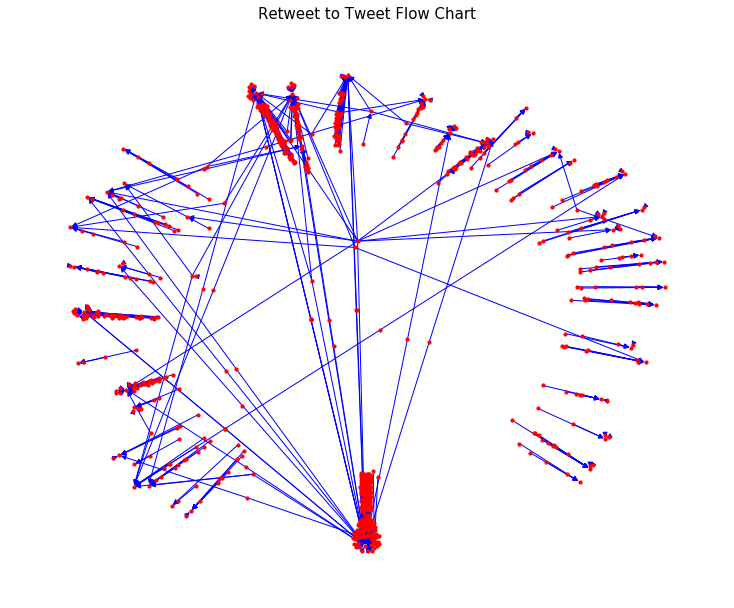

In [163]:
# Create retweet network from edgelist
G_rt = nx.from_pandas_edgelist(
    top,
    source = 'person1', 
    target = 'person2',
    create_using = nx.DiGraph())
    
# Print the number of nodes
print('Nodes in RT network:', len(G_rt.nodes()))

# Print the number of edges
print('Edges in RT network:', len(G_rt.edges()))

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
nx.draw(G_rt, node_size=10, edge_color='blue', node_color='red')
plt.title('Retweet to Tweet Flow Chart', size=15)
plt.show()

In [164]:
graph_centrality = nx.degree_centrality(G_rt)
sorted(graph_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('RT_com', 0.2974025974025974),
 ('sotiridi', 0.12077922077922078),
 ('PDChina', 0.06623376623376623),
 ('CathayPak', 0.06103896103896104),
 ('ASBreakingNews', 0.05844155844155844)]

In [165]:
graph_closeness = nx.closeness_centrality(G_rt)
sorted(graph_closeness.items(), key=lambda x: x[1], reverse=True)[:5]

[('RT_com', 0.2948553592330416),
 ('sotiridi', 0.11819578271191174),
 ('PDChina', 0.06366182836771071),
 ('CathayPak', 0.05844155844155844),
 ('ASBreakingNews', 0.057568660847349365)]

In [166]:
graph_betweenness = nx.betweenness_centrality(G_rt, normalized=True, endpoints=False)
sorted_bet=sorted(graph_betweenness.items(), key=lambda x: x[1], reverse=True)[:50]

In [167]:
sorted_bet

[('V2019N', 3.377636667623664e-05),
 ('EndGameWW3', 1.3510546670494655e-05),
 ('NinaKySt', 6.7552733352473276e-06),
 ('CaliCali2000', 5.0664550014354955e-06),
 ('rengle112', 5.0664550014354955e-06),
 ('scruffy65', 3.3776366676236638e-06),
 ('CoronavirusR', 1.6888183338118319e-06),
 ('PDChina', 0.0),
 ('Asad83M', 0.0),
 ('sotiridi', 0.0),
 ('livecrisisnews', 0.0),
 ('AmbLINSongtian', 0.0),
 ('Barbara96913515', 0.0),
 ('CarolYujiaYin', 0.0),
 ('ASBreakingNews', 0.0),
 ('ChinaDaily', 0.0),
 ('RT_com', 0.0),
 ('GestriLoris', 0.0),
 ('CoronaVirusFlu', 0.0),
 ('SaadAbedine', 0.0),
 ('FAANews', 0.0),
 ('flightradar24', 0.0),
 ('WuhanCoronavir3', 0.0),
 ('WarsontheBrink', 0.0),
 ('Terrence_STR', 0.0),
 ('CathayPak', 0.0),
 ('olliecarroll', 0.0),
 ('NaphiSoc', 0.0),
 ('Apex_WW', 0.0),
 ('EpochTimes', 0.0),
 ('Razarumi', 0.0),
 ('ScottAnthonyUSA', 0.0),
 ('broomstick33', 0.0),
 ('MikeChillit', 0.0),
 ('Judmir3', 0.0),
 ('ZyroFoxtrot', 0.0),
 ('DocRock1007', 0.0),
 ('AfricaRepublic', 0.0),
 ('lea

In [154]:
a_list = []
for x in range(0,len(sorted_bet)): 
    b = str(sorted_bet[x][0])
    a_list.append(b)

In [161]:
def vinay(name): 
    if name in a_list: 
        return 1 
    return 0 

one_two = df2['person2'].map(vinay)
df2['top_50'] = one_two
top = df2[df2['top_50'] == 1]

In [162]:
top

,person1,person2,tweets,tweets1,top_50
4,PDChina,PDChina,The #1st death outside China from the new #co...,The #1st death outside China from the new #co...,1
9,Asad83M,Asad83M,Reality that should be spread regarding #Coro...,Reality that should be spread regarding #Coro...,1
15,PDChina,PDChina,The #1st death outside China from the new #co...,The #1st death outside China from the new #co...,1
16,V2019N,V2019N,"#HongKong scientists: - ~75,815 people in Wuh...","#HongKong scientists: - ~75,815 people in Wuh...",1
19,sotiridi,sotiridi,And another video footage of Chinese governme...,And another video footage of Chinese governme...,1
...,...,...,...,...,...
9970,infidelsaracen,sotiridi,More shocking evidence of people in the #Hube...,RT,1
9972,kristyC00,Barbara96913515,Facing a severe shortage of masks amid #coron...,RT,1
9983,Bilqeees_i,PDChina,"Due to the outbreak of #coronavirus, Dian Lak...",RT,1
9986,Nasir98991336,CathayPak,"We appreciate Dr.Muhammad Usman Janjua,a fore...",RT,1


In [113]:
non_duplicates = df2['person2'].value_counts()
df3=df2[df2['person2'].isin(non_duplicates[non_duplicates].index)]

In [114]:
df3['person2'].value_counts()

TomValletti      856
RT_com           482
sotiridi         266
UNHumanRights    234
CGTNOfficial     164
                ... 
AstroKatie        16
media_resist      16
NIOGlobal         16
CPHO_Canada       16
LivesMorgoth      16
Name: person2, Length: 98, dtype: int64

Nodes in RT network: 2546
Edges in RT network: 2781


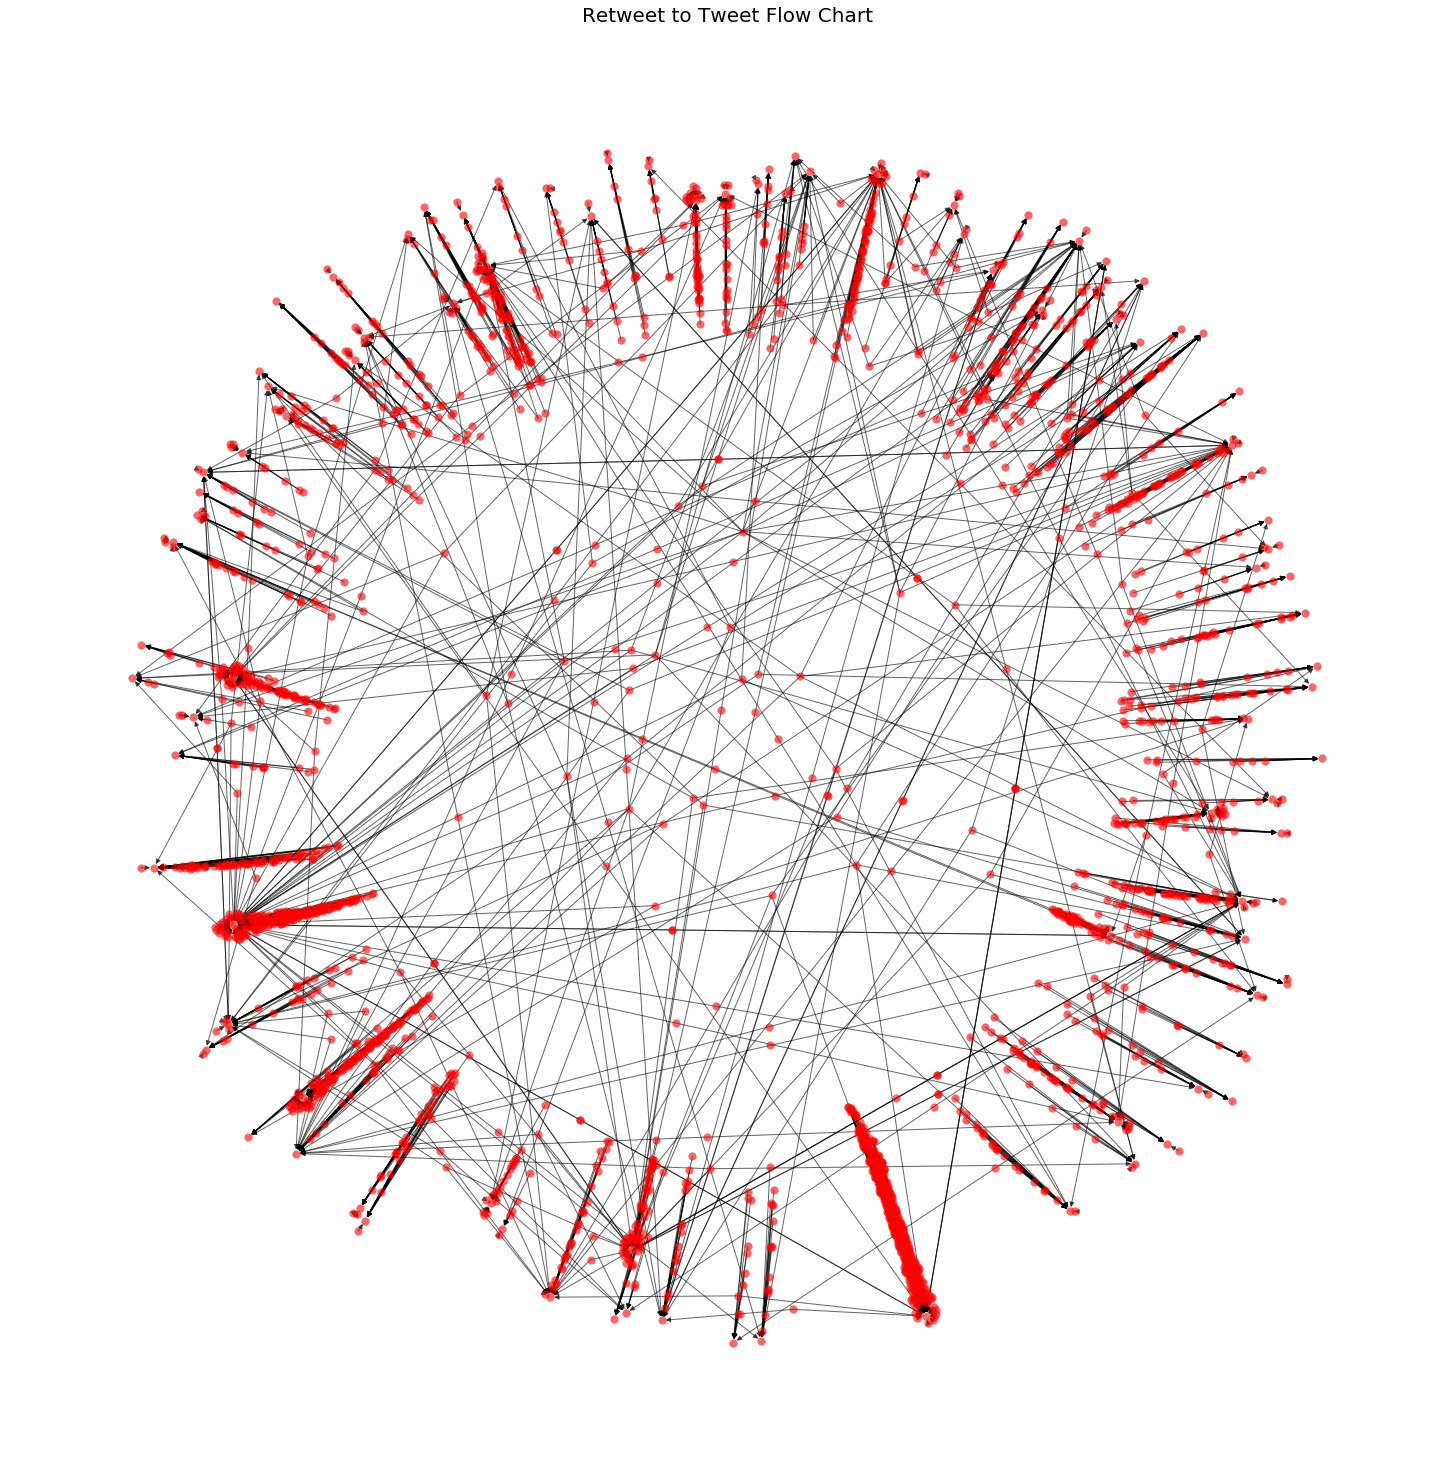

In [115]:
# Create retweet network from edgelist
G_rt1 = nx.from_pandas_edgelist(
    df3,
    source = 'person1', 
    target = 'person2',
    create_using = nx.DiGraph())
    
# Print the number of nodes
print('Nodes in RT network:', len(G_rt1.nodes()))

# Print the number of edges
print('Edges in RT network:', len(G_rt1.edges()))

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
nx.draw(G_rt1, node_color="red", cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=60, alpha=0.6, with_labels=False)
plt.title('Retweet to Tweet Flow Chart', size=20)
plt.show()

In [116]:
graph_centrality = nx.degree_centrality(G_rt1)
sorted(graph_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('TomValletti', 0.16895874263261296),
 ('RT_com', 0.0899803536345776),
 ('UNHumanRights', 0.046758349705304514),
 ('sotiridi', 0.03654223968565815),
 ('jenniferatntd', 0.032220039292730845)]

In [117]:
graph_closeness = nx.closeness_centrality(G_rt1)
sorted(graph_closeness.items(), key=lambda x: x[1], reverse=True)[:5]

[('TomValletti', 0.1681728880157171),
 ('RT_com', 0.08919449901768173),
 ('UNHumanRights', 0.045972495088408644),
 ('sotiridi', 0.03575638506876228),
 ('jenniferatntd', 0.03143418467583497)]

In [120]:
graph_betweenness = nx.betweenness_centrality(G_rt1, normalized=True, endpoints=True)
sorted(graph_betweenness.items(), key=lambda x: x[1], reverse=True)[:5]

[('TomValletti', 6.605376591347882e-05),
 ('RT_com', 3.503318893074695e-05),
 ('UNHumanRights', 1.805675376606781e-05),
 ('sotiridi', 1.4044141818052742e-05),
 ('CathayPak', 1.4044141818052742e-05)]

In [119]:
#plt.figure(figsize = (20,20))
#nx.draw(G_rt1, node_color="red", cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=60, alpha=0.6, with_labels=False)
#nx.draw_networkx_nodes(G_rt1, nodelist=central_nodes, node_size=300, node_color=colors_central_nodes)